1. Exploration du Dataset


On commence par importer les bibliothèques nécessaires et afficher un aperçu des données
la bibliothèques StandardScaler a etait utiliser pour normaliser les données

In [2]:
# Importation des bibliothèques nécessaires
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

file_path = "bienetre.csv"
df = pd.read_csv(file_path)




In [4]:
# Affichage des premières lignes du dataset
print("Aperçu des premières lignes du dataset :")
print(df.head())



Aperçu des premières lignes du dataset :
   target        age      taille      poids       revenu  experience  \
0       1  76.378818  172.472900  93.637574  2317.284189   23.187146   
1       1  39.629339  162.527782  88.071856  2740.909189   26.742305   
2       0  36.506832  196.457696  85.160759  3541.036636   20.895824   
3       1  50.016190  174.829299  72.362368  3093.794975   26.155986   
4       1  60.743330  171.536491  54.874865  2113.805284   14.771488   

   education        imc    stress  nb_enfants  ...  exercice  alimentation  \
0   2.524067  24.544095  5.805570         1.0  ...       4.0      6.128322   
1   3.136856  26.805875  3.970287         1.0  ...       1.0      6.068320   
2   4.282662  24.218407  2.312967         0.0  ...       3.0      6.503321   
3   3.007974  23.452811  5.387465         0.0  ...       3.0      6.015851   
4   2.780533  26.065223  6.859302         1.0  ...       3.0      5.344601   

    sommeil    pression  cholesterol  activite  satisfact

In [5]:
# Vérification des types de données
print("\nTypes des colonnes :")
print(df.dtypes)

# Vérification des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne :")
print(df.isnull().sum())

# Résumé statistique des variables numériques
print("\nRésumé statistique des variables numériques :")
print(df.describe())




Types des colonnes :
target            int64
age             float64
taille          float64
poids           float64
revenu          float64
experience      float64
education       float64
imc             float64
stress          float64
nb_enfants      float64
depenses        float64
exercice        float64
alimentation    float64
sommeil         float64
pression        float64
cholesterol     float64
activite        float64
satisfaction    float64
risque          float64
sante           float64
bienetre        float64
dtype: object

Nombre de valeurs manquantes par colonne :
target          0
age             0
taille          0
poids           0
revenu          0
experience      0
education       0
imc             0
stress          0
nb_enfants      0
depenses        0
exercice        0
alimentation    0
sommeil         0
pression        0
cholesterol     0
activite        0
satisfaction    0
risque          0
sante           0
bienetre        0
dtype: int64

Résumé statistique des v

 On applique ensuite la normalisation avec StandardScaler pour mettre toutes les variables à la même échelle et ne pas avoir des variables aient plus d’influence que d’autres

In [308]:
# Normalisation des variables 
features = df.drop('target', axis=1)
target = df['target']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


on crée un DataFrame contenant les données normalisées pour lutiliser dans les prochaines étapes

In [310]:
# Création d'un DataFrame normalisé pour la corrélation
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)

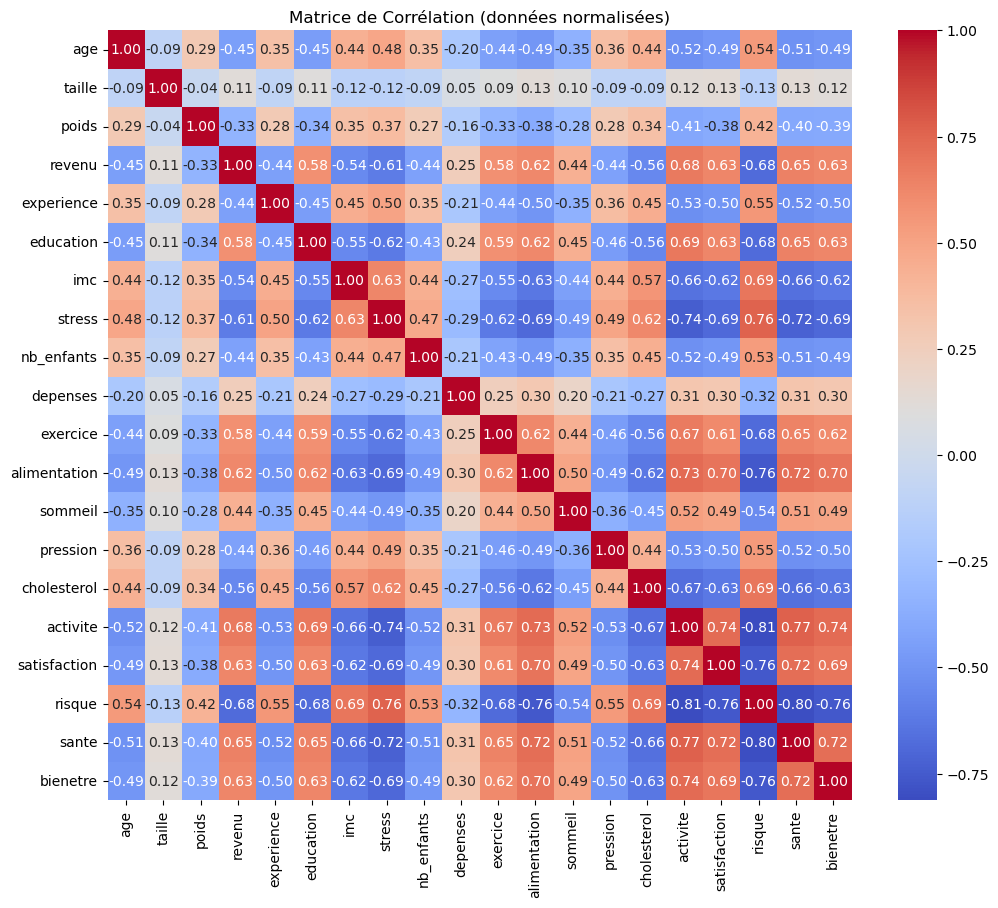

In [312]:
# Affichage de la matrice de corrélation normalisée
plt.figure(figsize=(12, 10))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation (données normalisées)")
plt.show()


Visualisation PCA en 2D
On applique une PCA à 2 composantes et on affiche un graphique en couleur selon la classe cible la classe 0 pour sain 1 pour Modéré et 2 pour  À Risque .

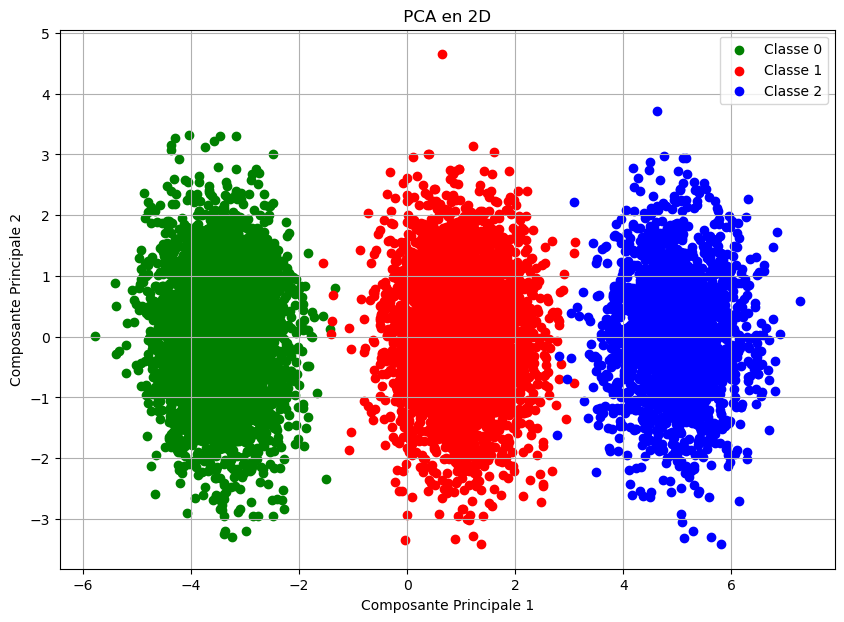

 Variance expliquée par la PCA 2D : 57.29%


In [314]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# PCA 2D
pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(features_scaled)

# Création d'un DataFrame pour gérer les couleurs
pca_df_2d = pd.DataFrame(x_pca_2d, columns=["PC1", "PC2"])
pca_df_2d['target'] = target.values

# Affichage avec couleurs 
colors = {0: 'green', 1: 'red', 2: 'blue'}

plt.figure(figsize=(10, 7))

for class_value, color in colors.items():
    subset = pca_df_2d[pca_df_2d['target'] == class_value]
    plt.scatter(subset['PC1'], subset['PC2'], c=color, label=f'Classe {class_value}')

plt.title(" PCA en 2D ")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Affichage de la variance expliquée
variance_expliquee_2d = pca_2d.explained_variance_ratio_.sum() * 100
print(f" Variance expliquée par la PCA 2D : {variance_expliquee_2d:.2f}%")


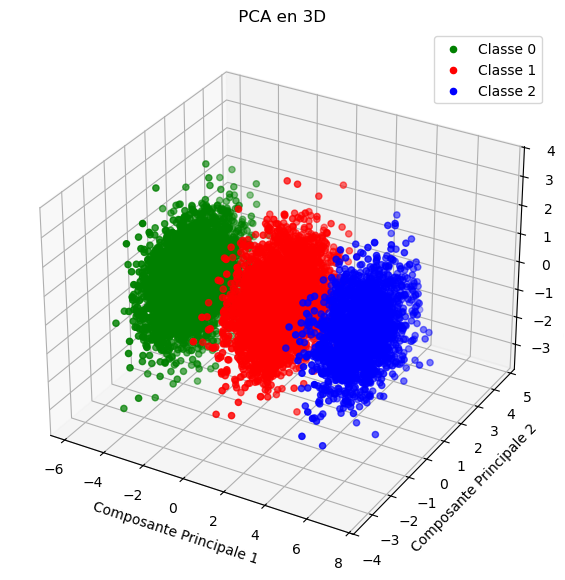

 Variance expliquée par la PCA 3D : 61.67%


In [316]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA 3D
pca_3d = PCA(n_components=3)
x_pca_3d = pca_3d.fit_transform(features_scaled)

# Création d'un DataFrame pour gérer les couleurs
pca_df_3d = pd.DataFrame(x_pca_3d, columns=["PC1", "PC2", "PC3"])
pca_df_3d['target'] = target.values

# Affichage 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Affichage avec couleurs 
for class_value, color in colors.items():
    subset = pca_df_3d[pca_df_3d['target'] == class_value]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=f'Classe {class_value}')

ax.set_title(" PCA en 3D")
ax.set_xlabel("Composante Principale 1")
ax.set_ylabel("Composante Principale 2")
ax.set_zlabel("Composante Principale 3")
ax.legend(loc='best')
plt.show()

# Affichage de la variance expliquée
variance_expliquee_3d = pca_3d.explained_variance_ratio_.sum() * 100
print(f" Variance expliquée par la PCA 3D : {variance_expliquee_3d:.2f}%")


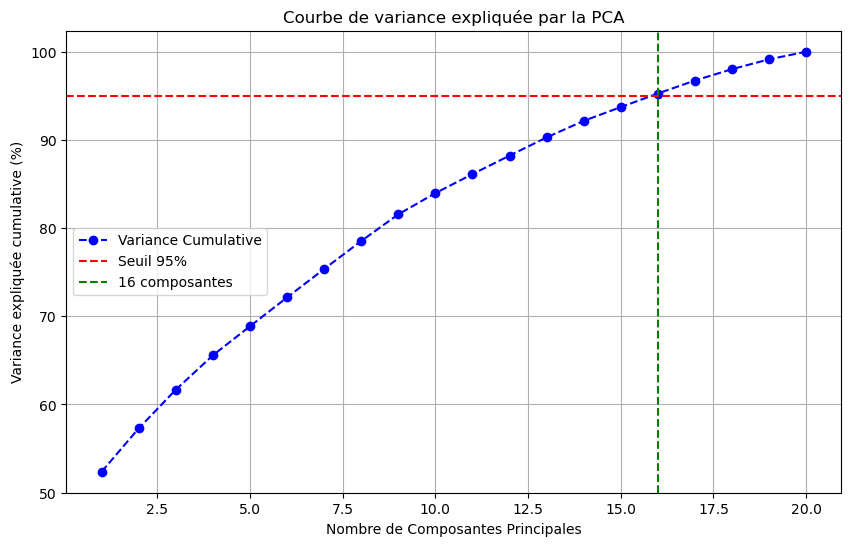

Nombre de composantes nécessaires pour atteindre 95% de variance expliquée : 16


In [318]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Séparer les features et la cible
X = df.drop(columns=["target"])  
y = df["target"]



# Appliquer PCA avec autant de composantes que de variables
pca = PCA(n_components=X_scaled.shape[1])
pca.fit(X_scaled)

# Variance expliquée par chaque composante
variance_expliquee = pca.explained_variance_ratio_

# Variance expliquée cumulative
variance_cumulative = np.cumsum(variance_expliquee)

# Trouver le nombre de composantes nécessaires pour atteindre 95% de variance expliquée
n_composantes_95 = np.argmax(variance_cumulative >= 0.95) + 1

# Tracé de la variance expliquée cumulative
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_cumulative) + 1), variance_cumulative * 100, marker='o', linestyle='--', color='b', label="Variance Cumulative")
plt.axhline(y=95, color='r', linestyle='--', label='Seuil 95%')
plt.axvline(x=n_composantes_95, color='g', linestyle='--', label=f'{n_composantes_95} composantes')

plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance expliquée cumulative (%)")
plt.title("Courbe de variance expliquée par la PCA")
plt.legend()
plt.grid(True)

# Afficher la figure
plt.show()

# Affichage du nombre de composantes nécessaires
print(f"Nombre de composantes nécessaires pour atteindre 95% de variance expliquée : {n_composantes_95}")


In [272]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["target"]) 
y = df["target"]  

# Séparation du dataset en entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Affichage des dimensions des ensembles
print(f"Taille du dataset d'entraînement : {X_train.shape[0]} échantillons")
print(f"Taille du dataset de test : {X_test.shape[0]} échantillons")


Taille du dataset d'entraînement : 8000 échantillons
Taille du dataset de test : 2000 échantillons


In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],  # Réduire davantage la profondeur
    'min_samples_leaf': [20, 50, 100],  # Augmenter le nombre minimum d'échantillons par feuille
    'min_impurity_decrease': [0.02, 0.05],  # Augmenter la diminution minimale de l'impureté
    'criterion': ['gini', 'entropy']  # Tester les deux critères
}

# Initialisation du modèle et Grid Search
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(pca_16, target)

# Affichage des meilleurs paramètres et du score
print(" Meilleurs hyperparamètres :", grid_search.best_params_)
print(" Meilleur score obtenu :", grid_search.best_score_)


 Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.02, 'min_samples_leaf': 20}
 Meilleur score obtenu : 0.9986


In [275]:
# Import des modèles de classification et des outils d'évaluation
from sklearn.linear_model import LogisticRegression      # Régression Logistique
from sklearn.neighbors import KNeighborsClassifier        # KNN (k plus proches voisins)
from sklearn.model_selection import cross_val_score       # Validation croisée

 Accuracy du modèle KNN (k=5) : 0.9990


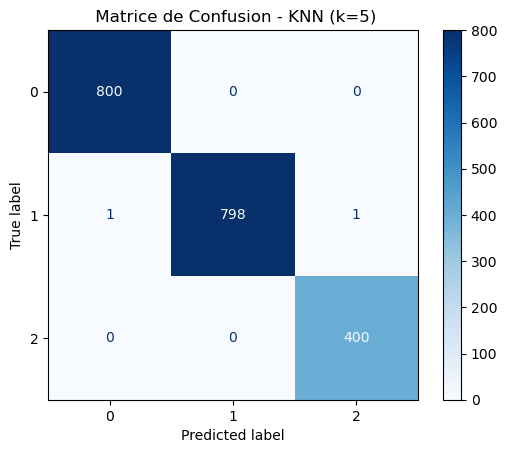

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


#  NORMALISATION DES DONNÉES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajuster sur train et transformer
X_test_scaled = scaler.transform(X_test)  # Appliquer la même transformation à test

#  ENTRAÎNEMENT DU MODÈLE KNN
k = 5  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

#  PRÉDICTION SUR LE TEST SET
y_pred = knn.predict(X_test_scaled)

# . ÉVALUATION DU MODÈLE
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy du modèle KNN (k={k}) : {accuracy:.4f}")

#  MATRICE DE CONFUSION
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues")
plt.title(f" Matrice de Confusion - KNN (k={k})")
plt.show()


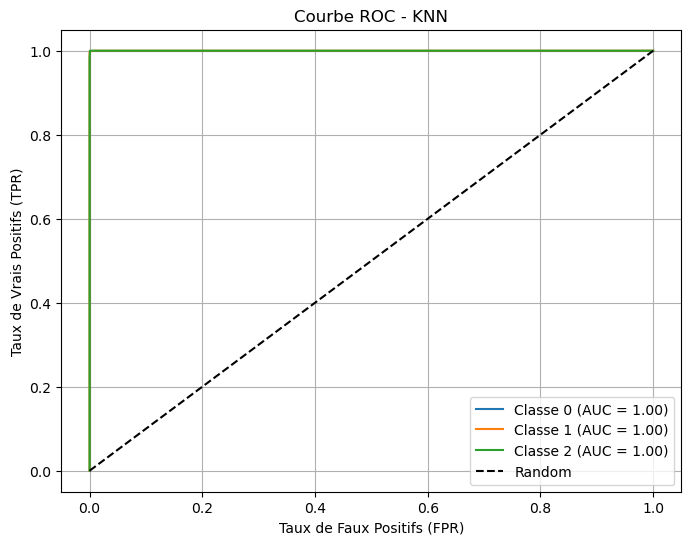

In [280]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarisation des labels si classification multi-classe
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_score = knn.predict_proba(X_test_scaled)

# Initialisation du graphique
plt.figure(figsize=(8, 6))

# Tracer la courbe ROC pour chaque classe
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")

# Ajouter la diagonale (classif aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Configurer le graphe
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - KNN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


 Accuracy du modèle Régression Logistique : 1.0000


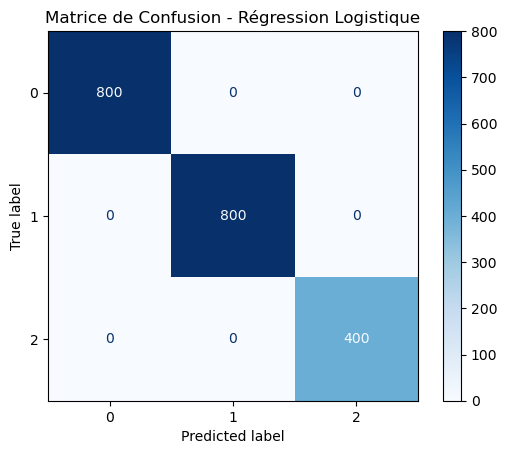

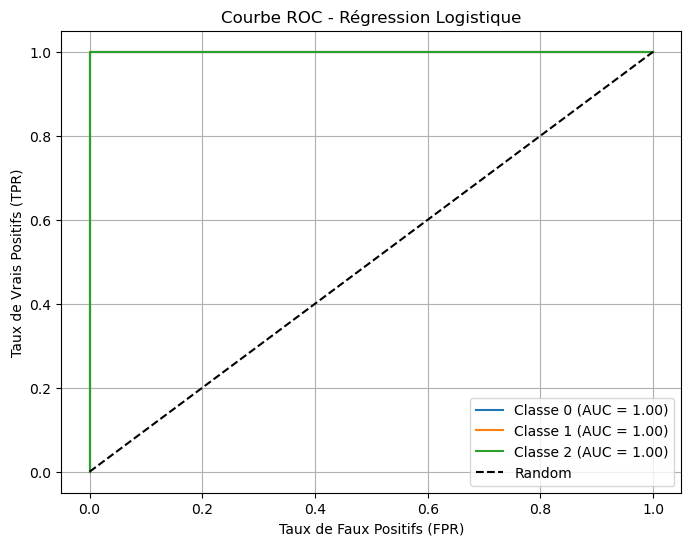

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize

#  INITIALISATION DU MODÈLE
logreg = LogisticRegression(max_iter=500, random_state=42)  # Augmenter max_iter si convergence lente

#  ENTRAÎNEMENT DU MODÈLE
logreg.fit(X_train_scaled, y_train)

#  PRÉDICTION SUR LE TEST SET
y_pred_logreg = logreg.predict(X_test_scaled)

#  ÉVALUATION DU MODÈLE
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f" Accuracy du modèle Régression Logistique : {accuracy_logreg:.4f}")

#  MATRICE DE CONFUSION
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=np.unique(y_train))
disp_logreg.plot(cmap="Blues")
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()

#  COURBE ROC & AUC
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_score_logreg = logreg.predict_proba(X_test_scaled)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_logreg[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")

#  Ajouter la diagonale (classif aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label="Random")

#  Configurer le graphe
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique")
plt.legend(loc="lower right")
plt.grid()
plt.show()


 Modèle de Régression Logistique
 ce Modèle on lutilise pour la classification binaire et multiclasses il estime la probabilité d’appartenance à une classe.


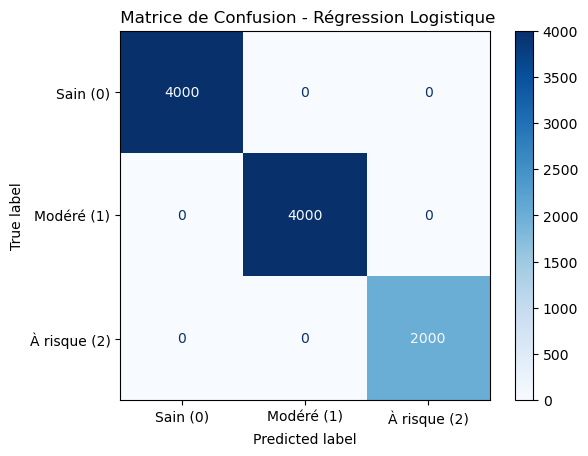

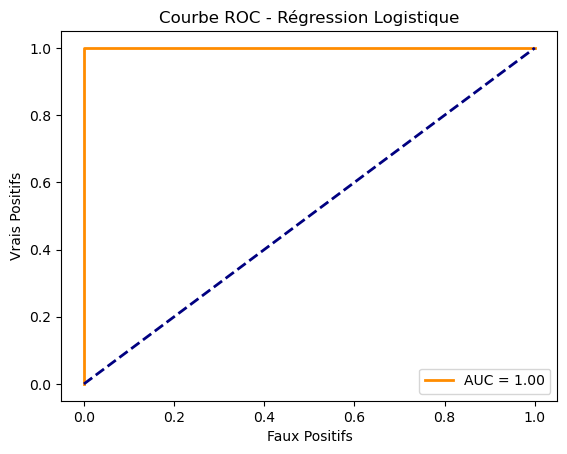

In [284]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc

# Entraîner le modèle de Régression Logistique
logreg.fit(features_scaled, target)

# Prédictions et matrice de confusion
y_pred_logreg = logreg.predict(features_scaled)
cm_logreg = confusion_matrix(target, y_pred_logreg)

# Affichage de la matrice
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Sain (0)', 'Modéré (1)', 'À risque (2)'])
disp_logreg.plot(cmap="Blues")
plt.title(" Matrice de Confusion - Régression Logistique")
plt.show()

# Courbe ROC
y_proba_logreg = logreg.predict_proba(features_scaled)
fpr, tpr, _ = roc_curve(target, y_proba_logreg[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Courbe ROC - Régression Logistique")
plt.xlabel("Faux Positifs")
plt.ylabel("Vrais Positifs")
plt.legend(loc="lower right")
plt.show()


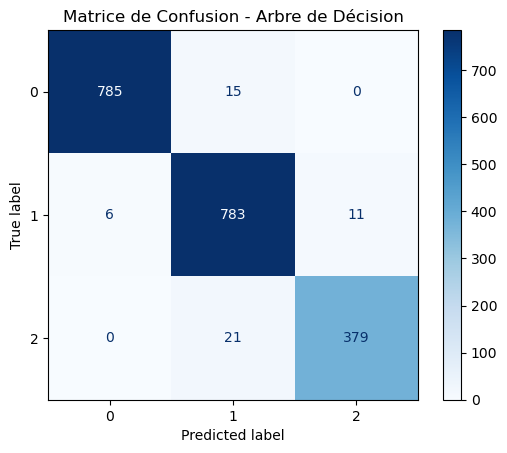

In [288]:
#  Matrice de confusion
cm_tree = confusion_matrix(y_test, y_pred_tree)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=np.unique(y_train))
disp_tree.plot(cmap="Blues")
plt.title("Matrice de Confusion - Arbre de Décision")
plt.show()


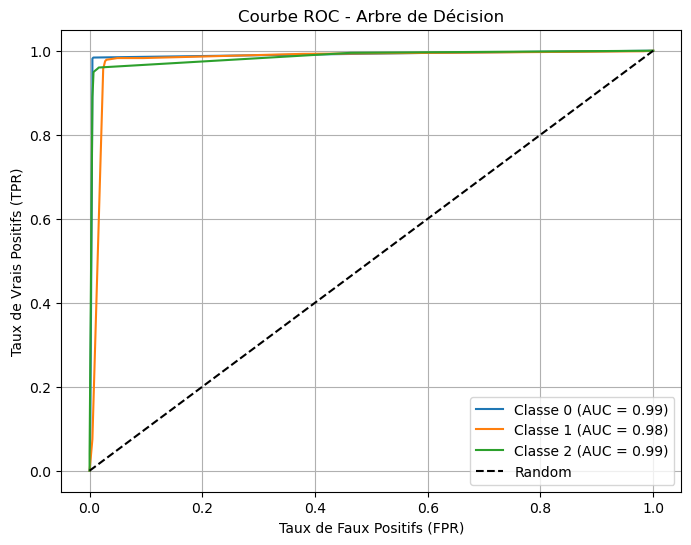

In [290]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

#  Binarisation des labels pour ROC multi-classe
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
y_score_tree = tree_clf.predict_proba(X_test_scaled)

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_tree[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Classe {i} (AUC = {roc_auc:.2f})")

#  Ajouter la diagonale (classif aléatoire)
plt.plot([0, 1], [0, 1], 'k--', label="Random")

#  Configurer le graphe
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Arbre de Décision")
plt.legend(loc="lower right")
plt.grid()
plt.show()


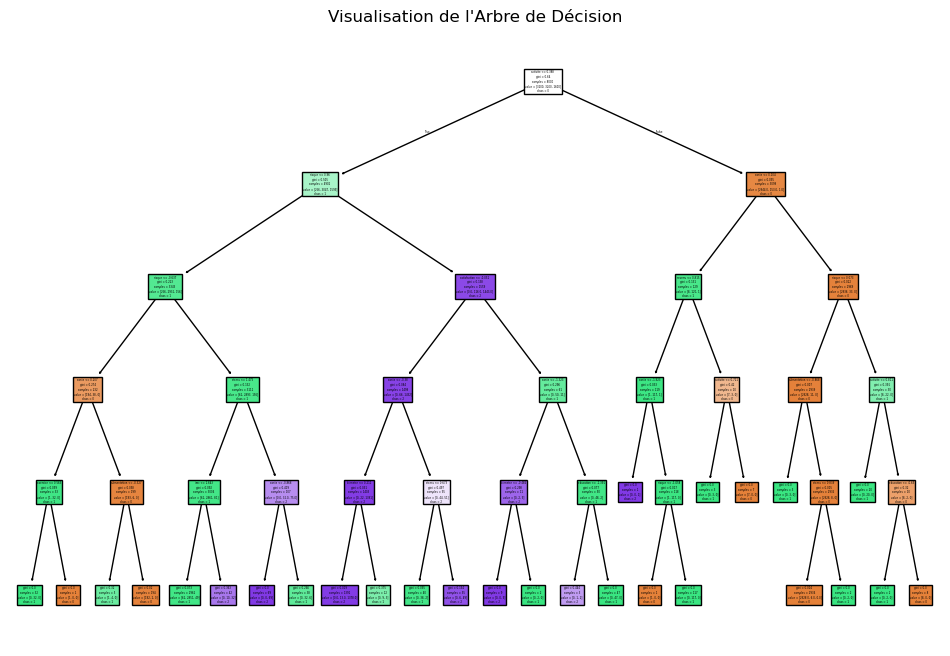

In [292]:
plt.figure(figsize=(12, 8))

# Utiliser les vrais noms des features depuis le DataFrame
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"Feature {i}" for i in range(X_train.shape[1])]

plot_tree(tree_clf, feature_names=feature_names, class_names=[str(c) for c in np.unique(y_train)], filled=True)

plt.title("Visualisation de l'Arbre de Décision")
plt.show()


In [300]:
from sklearn.model_selection import cross_val_score

# Calcul des scores avec validation croisée (5-fold cross-validation)
scores_logreg = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
scores_tree = cross_val_score(tree_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Moyenne des scores
mean_logreg = scores_logreg.mean()
mean_knn = scores_knn.mean()
mean_tree = scores_tree.mean()

print(f" Accuracy moyenne - Régression Logistique : {mean_logreg:.4f}")
print(f" Accuracy moyenne - KNN : {mean_knn:.4f}")
print(f" Accuracy moyenne - Arbre de Décision : {mean_tree:.4f}")

# Comparaison des performances
if mean_logreg > mean_knn and mean_logreg > mean_tree:
    print(" La Régression Logistique est le meilleur modèle.")
elif mean_knn > mean_logreg and mean_knn > mean_tree:
    print(" Le KNN est le meilleur modèle.")
elif mean_tree > mean_logreg and mean_tree > mean_knn:
    print(" L'Arbre de Décision est le meilleur modèle.")
else:
    print(" Les modèles ont des performances similaires.")


 Accuracy moyenne - Régression Logistique : 0.9996
 Accuracy moyenne - KNN : 0.9990
 Accuracy moyenne - Arbre de Décision : 0.9671
 La Régression Logistique est le meilleur modèle.


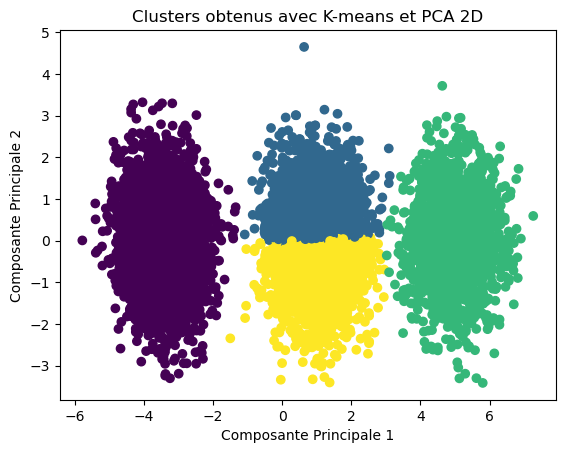

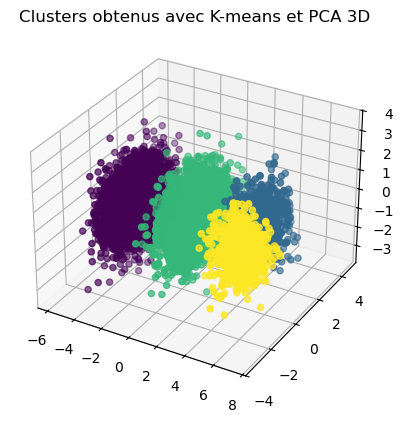

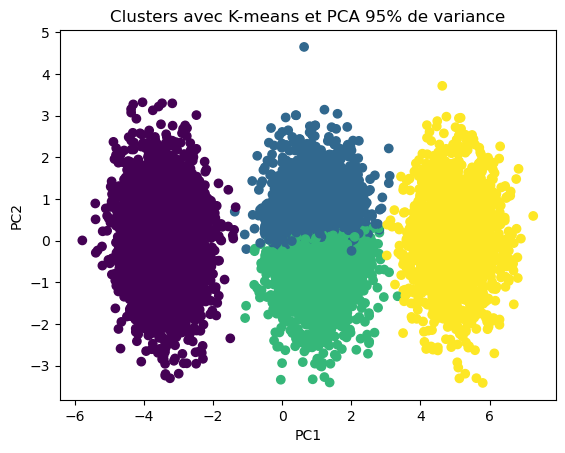

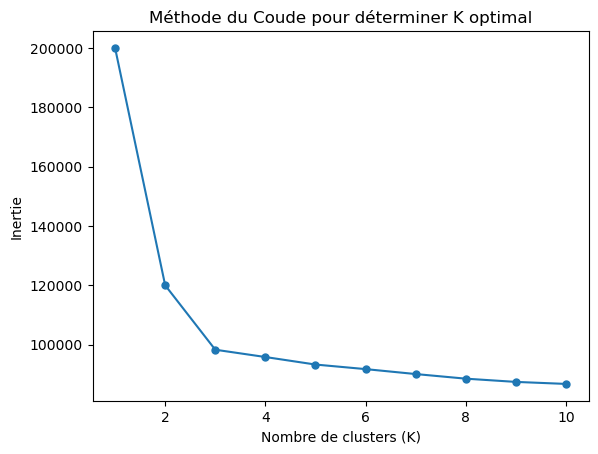

In [294]:
# Importations nécessaires
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
  

# 1. K-means avec PCA 2D
pca_2d = PCA(n_components=2).fit_transform(features_scaled)
kmeans_2d = KMeans(n_clusters=4, random_state=42).fit(pca_2d)
plt.figure()
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans_2d.labels_, cmap='viridis')
plt.title("Clusters obtenus avec K-means et PCA 2D")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.show()

# 2. K-means avec PCA 3D
from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3).fit_transform(features_scaled)
kmeans_3d = KMeans(n_clusters=4, random_state=42).fit(pca_3d)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=kmeans_3d.labels_, cmap='viridis')
ax.set_title("Clusters obtenus avec K-means et PCA 3D")
plt.show()

# 3. K-means avec PCA pour 95% de variance
pca_var = PCA(0.95)
pca_var_data = pca_var.fit_transform(features_scaled)
kmeans_var = KMeans(n_clusters=4, random_state=42).fit(pca_var_data)
plt.figure()
plt.scatter(pca_var_data[:, 0], pca_var_data[:, 1], c=kmeans_var.labels_, cmap='viridis')
plt.title("Clusters avec K-means et PCA 95% de variance")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 4. Méthode du coude pour déterminer K optimal
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, 'o-', markersize=5)
plt.title("Méthode du Coude pour déterminer K optimal")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie")
plt.show()
